# Memoization

- 앞에서 피보나치 수를 구하는 함수를 재귀함수로 구현한 알고리즘은 문제점이 있다
- 바로 "엄청난 중복 호출이 존재한다."는 것이다.
- 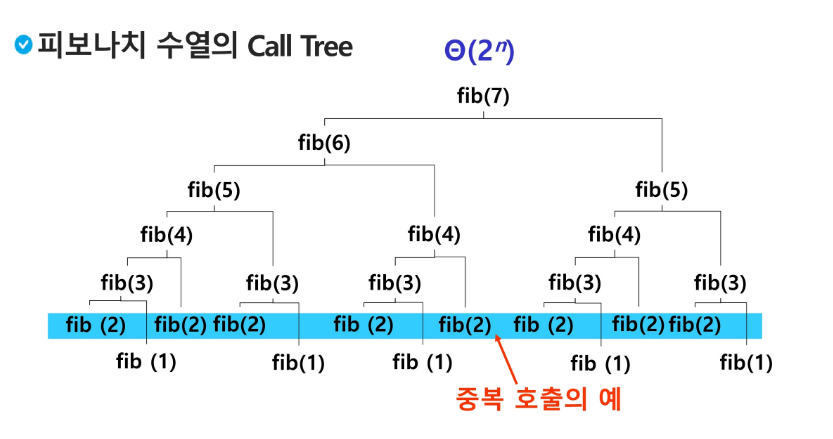
- f(n)을 여러번 계산하게 됨


### Memoization
- 메모이제이션은 컴퓨터 프로그램을 실행할 때 이전에  계산한 값을 메모리에 저장해서 매번 다시 계산하지 않도록 하여 전체적인 실행 속도를 빠르게 하는 기술이다. 동적 계획법의 핵심이 되는 기술이다.
- 글자 그대로 해석하면 '메모리에 넣기'라는 의미이며 '기억되어야 할 것'이라는 뜻의 라틴어 memorandum 에서 파생되었다. 흔히 '기억하기','암기하기' 라는 뜻의 memorization과 혼동하지만, 정확한 단어는 memoization이고 동사형은 memoize 이다
- 앞의 예에서 피보나치 수를 구하는 알고리즘에서 fibo(n)의 값을 계산하자마자 저장하면 (memoize), 실행 시간을 O² → θ(n) (세타n)으로 줄일 수 있다.


In [2]:
# memo를 위한 배열을 할당하고, 모두 0으로 초기화 한다.
# memo[0]을 0으로 memo[1]는 1로 초기화한다

def fibo1(n) :
    global memo
    if n >= 2 and memo[n] == 0 :  #0과 1은 따로 계산할 필요 없으니 2 이상부터
        #memo[n] == 0 : fibo(n)이 계산된 적이 없는 상태 (큰수에서 작은수로 가니까 fibo(0) 빼고는 값이 0일 수 없음)
        memo[n] = fibo1(n-1) + fibo1(n-2)
    return memo[n]

n=7

memo = [0] * (n+1)
memo[0] = 0     # == fibo(0) = 0
memo[1] =1      # == fibo(1) = 1 과 같음 
fibo1(n)
print(memo)         #[0, 1, 1, 2, 3, 5, 8, 13]
# == print(fibo1(n))

[0, 1, 1, 2, 3, 5, 8, 13]


In [5]:
# 메모이제이션 없이 재귀로 계산하는 방법
# 2의 n 제곱으로 계산되기 때문에 속도가 많이 느림
# 메모이제이션은 확실히 빠름!

def fibo(n) :
    if n<2 :
        return n
    else :
        return fibo(n-1) + fibo(n-2)
    

n=7

memo = [0] * (n+1)
memo[0] = 0     # == fibo(0) = 0
memo[1] =1      # == fibo(1) = 1 과 같음 

print(fibo1(n))

13


# DP (Dynamic Programing)
- 이런 방식이 있다정도 소개!
- 동적 계획 알고리즘은 그리디 알고리즘과 같이 최적화 문제를 해결하는 알고리즘이다.
- 동적 계획 알고리즘은 먼저 입력 크기가 작은 부분 문제들을 모두 해결한 후에 그 해들을 이용하여 보다 큰 크기의 부분 문제들을 해결하여, 최종적으로 원래 주어진 입력의 문제를 해결하는 알고리즘이다.
- 모든 문제에 적용 가능한 것은 아니지만 많은 문제에서 최적의 속도를 낼 수 있다.

### 피보나치 수 DP 적용
- 피보나치 수는 부분 문제의 답으로부터 본 문제의 답을 얻을 수 있으므로 최적 부분 구조로 이루어져 있다.
1. 문제를 부분 문제로 분할한다.
2. 부분 문제로 나누는 일을 끝냈으면 가장 작은 부분 문제부터 해를 구한다.(원래는 팩토리얼처럼 큰 수에서 작은 수로 찾아감)
3. 그 결과는 테이블에 저장하고, 테이블에 저장된 부분 문제의 해를 이용하여 상위 문제의 해를 구한다.


In [ ]:
def fibo2(n) :
    f = [0] * (n+1)                 #값을 넣을 리스트 만들기
    f[0] = 0
    f[1] = 1                        #기본 값 넣기
    for i in range(2,n+1) :
        f[i] = f[i-1] + f[i-2]

    return f[n]

#짧고 간단해보이지만 문제 속에 있으면 이해하기 어려움

### DP의 구현 방식
- 이런게 있다
- recursive 방식 : fib1()
- iterative 방식 : fib2()

- memoization 을 재귀적 구조에 사용하는 것보다 반복적 구조로 DP를 구현한 것이 성능 면에서 보다 효율적이다.
- 재귀적 구조는 내부에 시스템 호출 스택을 사용하는 오버헤드가 발생하기 때문이다.

# DFS (깊이우선탐색)
- 비선형구조인 그래프 구조는 그래프로 표현된 모든 자료를 **중복 없이, 빠짐없이 검색**하는 것이 중요함.
- 두 가지 방법
  - 깊이 우선 탐색(Depth First Search, DFS) : (실제론 스택보다 재귀로 더 많이 사용함)
  - 너비 우선 탐색(Breadth First Search, BFS) : (둘 다 가능한 경우 너비우선을 더 많이 사용함)
- 시작 정점의 한 방향으로 갈 수 있는 경로가 있는 곳까지 깊이 탐색해 가다가 더 이상 갈 곳이 없게 되면, 가장 마지막에 만났던 갈림길 간선이 있는 정점으로 되돌아와서 다른 방향의 정점으로 탐색을 계속 반복하여 결국 모든 정점을 방문하는 순회 방법
- 가장 마지막에 만났던 갈림길의 정점으로 되돌아가서 다시 깊이 우선 탐색을 반복해야 하므로 후입선출 구조의 스택 사용
  - 내가 지나온 갈림길을 순서대로 정리해두고, 마지막부터 확인해야 마지막 갈림길로 돌아갈 수 있음
  - 스택과 재귀 두가지 방법이 있으며 주로 스택을 사용함
  - 너비우선탐색과 비교해서 헷갈리지 않게 잘 보기


### 로봇이 선을 따라 모든 칸을 탐색하는 방법
- 로봇은 갈림길에서 일단 오른쪽으로 간다

1. 시작 정점 v를 결정하여 방문한다.
2. 정점 v에 인접한 정점 중에서
  1) 방문하지 않은 정점 W가 있으면, 정점 v를 스택에 push하고 정점 w를 방문한다. 그리고 w를 v로 하여 다시 2를 반복한다.
  2) 방문하지 않은 정점이 없으면, 탐색의 방향을 바꾸기 위해서 스택을 pop 하여 받은 가장 마지막 방문 정점을 v로 하여 다시 2를 반복한다.
3. 스택이 공백이 될 때까지 2를 반복한다.

```python
    visited[](방문했던 기록- 중복없이, 빠짐없이 봐야하기 때문), stack[] 초기화 
    DFS(v)
      시작점 v 방문;    #출발점은 대부분 사전에 정해짐. 무조건 1이 아님
      visited[v] <- true
      while{
        if (v의 인접 정점 중(연결 정점 중) 방문 안 한 정점 w가 있으면)
          push(v) ; 
          v <- w; (w에 방문)  (현위치v)
          visited[w] <- true;
        else
          if (True : 스택이 비어 있지 않으면) (에러검사)
            v <- pop(stack);
          else (False : 출발지로 돌아온 상태면 스택이 비어있는 상태) 
            break
      }
    end DFS()
```


### DFS 예

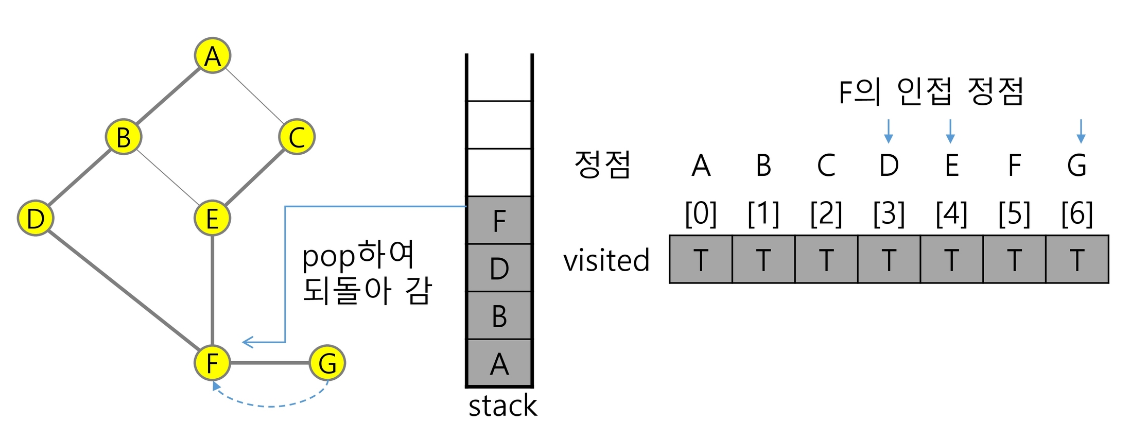

1. 정점 A를 시작으로 깊이 우선 탐색을 시작
2. 정점 A에 방문하지 않은 정점 B,C 가 있으므로 A를 스택에 push하고, 인접 정점 B와 C 중에서 오름 차순에 따라 B를 선택하여 탐색을 계속한다. 
   - 오름차순, 내림차순 등의 규칙은 문제에서 지정해주기도 함. 지정해주지 않으면 스스로 정하면 됨. 규칙에 따라 답이 여러개 나올 수 있음. 
3. 정점 B에 방문하지 않은 정점 D,E 가 있으므로 B를 스택에 push 하고, 인접정점 D와 E 중에서 오름차순에 따라 D를 선택하여 탐색을 계속한다.
4. 정점 D에 방문하지 않은 정점 F가 있으므로 D를 스택에 push하고, 인접정점 F를 선택하여 탐색을 계속한다.
5. 정점 F에 방문하지 않은 정점 E,G가 있으므로 F를 스택에 push하고, 인접정점 E와 G 중에서 오름차순에 따라 E를 선택하여 탐색을 계속한다.
6. 정점 E에 방문하지 않은 정점 C가 있으므로 E를 스택에 push하고, 인접정점 C를 선택하여 탐색을 계속한다.
7. 정점 C에서 방문하지 않은 인접정점이 없으므로, 마지막 정점으로 돌아가기 위해 스택을 pop하여 받은 정점 E에 대해서 방문하지 않은 인접 정점이 있는지 확인한다.
8. 정점 E는 방문하지 않은 인접정점이 없으므로, 다시 스택을 pop하여 받은 정점 F에 대해서 방문하지 않은 인접정점이 있는지 확인한다.
9. 정점 F에 방문하지 않은 정점 G가 있으므로 F를 스택에 push하고, 인접정점 G를 선택하여 탐색을 계속한다.
10. 정점 G에서 방문하지 않은 인접정점이 없으므로, 마지막 정점으로 돌아가기 위해 스택을 pop하여 받은 정점 F에 대해서 방문하지 않은 인접정점이 있는지 확인한다.
11. 정점 F에서 방문하지 않은 인접정점이 없으므로, 다시 마지막 정점으로 돌아가기 위해 스택을 pop하여 받은 정점 D에 대해서 방문하지 않은 인접정점이 있는지 확인한다.
12. 정점 D에서 방문하지 않은 인접정점이 없으므로, 다시 마지막 정점으로 돌아가기 위해 스택을 pop하여 받은 정점 B에 대해서 방문하지 않은 인접정점이 있는지 확인한다.
13. 정점 B에서 방문하지 않은 인접정점이 없으므로, 다시 마지막 정점으로 돌아가기 위해 스택을 pop하여 받은 정점 A에 대해서 방문하지 않은 인접정점이 있는지 확인한다.
14. 현재 정점 A에서 방문하지 않은 인접 정점이 없으므로 자미작 정점으로 돌아가기 위해 스택을 pop하는데, 스택이 공백이므로 깊이 우선 탐색을 종료한다.
   - 깊이 우선 탐색 경로 : A - B - D - F - E - C - G


깊이우선탐색, 너비우선탐색, 백트레킹, 구현능력
문제풀이3 - 


In [ ]:
'''
1
7 8
1 2 1 3 2 4 2 5 4 6 5 6 6 7 3 7
'''

def DFS(s, V) :                 # s 시작정점, v 정점 개수(1번부터인 정점의 마지막 정점. 몇번부터인지 주의)
    visited = [0]*(V+1)         # 방문한 정점을 표시
    stack = []                  # 스택 생성
    visited[s] = 1              # 시작 정점 방문 표시
    v = s
    while True :
        for w in adjL[v] :      # v에 인접하고, 방문안한 w가 있으면
            if visited[w] == 0 :
                stack.append(v) # push(v) 현재 정점을 push하고
                v = w           # w에 방문
                visited[w] = 1    # w에 방문 표시
                break           # v부터 다시 탐색

        else :                  # 남은 인접정점이 없어서 break가 걸리지 않은 경우
            if stack :          # 이전 갈림길을 스택에서 꺼내서 ... if TOP -> -1
                v = stack.pop()
            else :              # 되돌아갈 곳이 없으면 남은 갈림길이 없으면 탐색 종료
                break           # while True :


T = int(input())
for tc in range(1,T+1) :
    V, E  = map(int, input().split())   #V : 정점 번호 혹은 개수 (여기선 개수) #E : 간선(연결선) 개수

    adjL = [[] for _ in range(V+1)]
    arr = list(map(int, input().split()))
    for i in range(E) :
        v1, v2 = arr[i*2], arr[i*2+1]
        adjL[v1].append(v2)
        adjL[v1].append(v1)
    # print(adjL)

    DFS(1,V)


# 교수님

### 그래프 
- 정점들(V)과 간선들(Edge)의 집합
- 실세계 모습을 추상화하기 좋은 도구
- 정점 : 사람, 사물, 개념
  - 정점 개수 : 1번부터 V번까지
  - 행렬 또는 리스트를 이용해 인접 접점을 파악할 수 있음
  
- 간선 : 정점들간의 관계
- 그래프 : 간선 정보 저장! 각 정점마다 인접 정점 저장!
- 그래프 문제라면 유향인지 무향인지 먼저 확인해야 함
  - 무향 그래프 : 동등한 관계 (A - B : 서로가 인접 정점) - 일반적
  - 유향 그래프 : 화살표, 일방적인 관계  (A → B : B는 A의 인접 정점이지만 A는 B의 인접 정점이 아님)


- 2005 파스칼의 삼각형 문제 참고






In [ ]:
# 무향그래프

'''
7 8
1 2 1 3 2 4 2 5 4 6 5 6 6 7 3 7
'''

V, E = 7, 8
arr = 1, 2, 1, 3, 2, 4, 2, 5, 4, 6, 5, 6, 6, 7, 3, 7


# V, E = map(int,input().split())
# arr = list(map(int,input().split()))

#인접리스트 : 2개씩 끊어서 저장
G = [[] for _ in range(V+1)]    #인접정점을 저장할 리스트(0은 버리고 1부터 시작하니까 +1)
for i in range(0, E*2, 2) :
    u, v = arr[i], arr[i+1]     # 정점을 저장하는 변수 : u,v,w 
    G[u].append(v)
    G[v].append(u)              # 무향그래프니까 서로 저장

for i in range(1, V+1) :
    print(i, '-->', G[i])       # 인접 접점이 리스트로 나옴

In [10]:
# DFS 를 재귀호출로 표현
# 스택 필요 없음 방문표시만 있으면 됨


V, E = 7, 8
arr = 1, 2, 1, 3, 2, 4, 2, 5, 4, 6, 5, 6, 6, 7, 3, 7


# V, E = map(int,input().split())
# arr = list(map(int,input().split()))

#인접리스트 : 2개씩 끊어서 저장
G = [[] for _ in range(V+1)]    #인접정점을 저장할 리스트(0은 버리고 1부터 시작하니까 +1)
for i in range(0, E*2, 2) :
    u, v = arr[i], arr[i+1]     # 정점을 저장하는 변수 : u,v,w 
    G[u].append(v)
    G[v].append(u)              # 무향그래프니까 서로 저장


visited = [0] * (V+1)

def dfs(v) :
    # v를 방문하고
    visited[v] =1 ; print(v, end = " ")

    # v가 방문하지 않은 인접 정점을 찾아서
    for w in G[v] :
        if not visited[w] :
            dfs(w)
        # w에 대해 재귀호출한다.(w를 방문한다.)


dfs(1)

1 2 4 6 5 7 3 

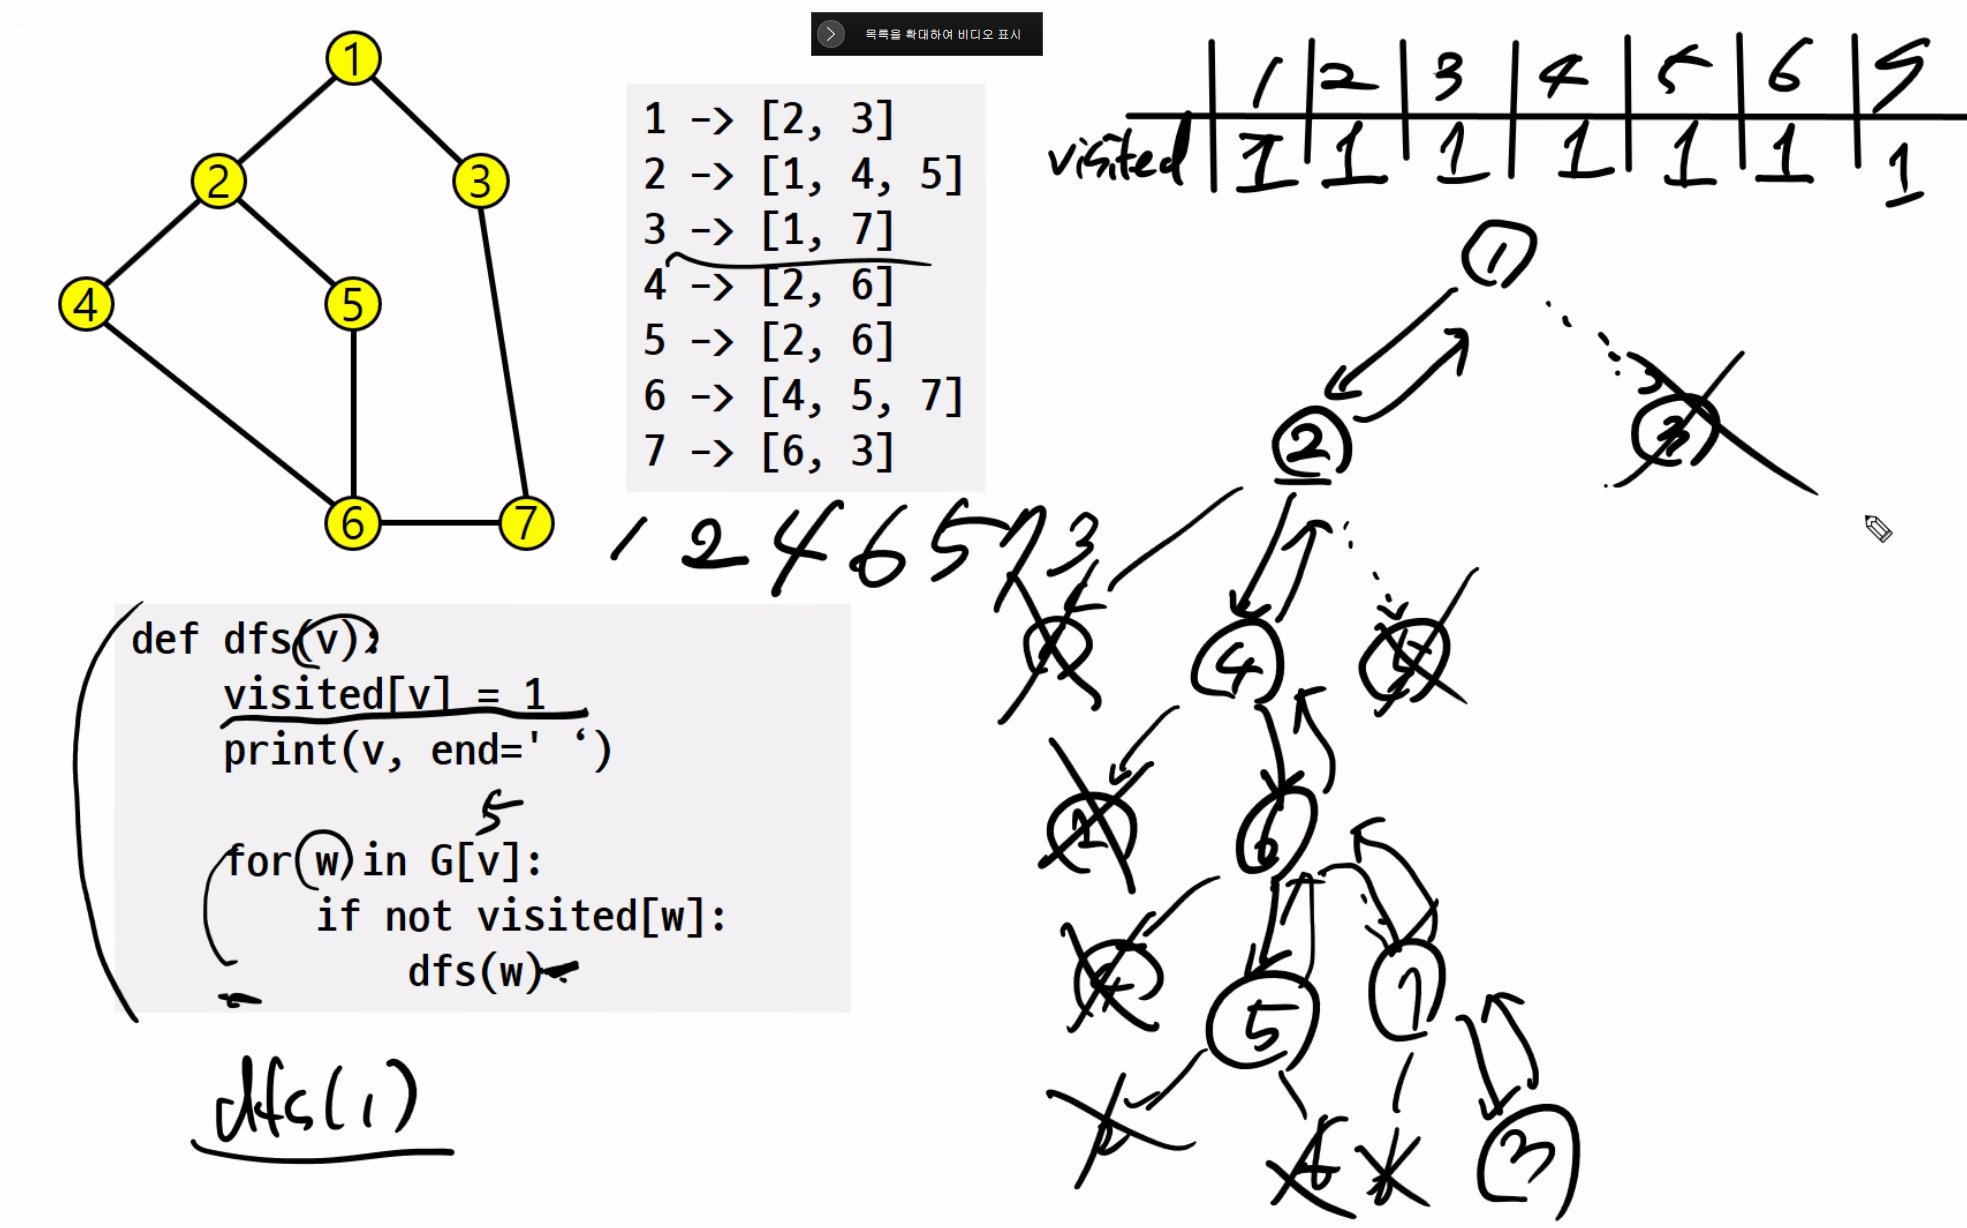